# NonParametric Methods

## Lazy learner

* The method does not keep calculated values (parameters).
* Does not "learn".

In [1]:
import sklearn as skl
import matplotlib as mpl

print("Scikit Learn version: "+ skl.__version__)
print("Matplotlib version: "+ mpl.__version__)

Scikit Learn version: 1.2.2
Matplotlib version: 3.7.1


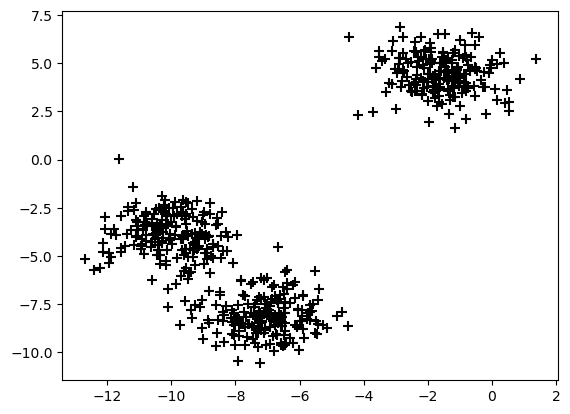

In [25]:
import matplotlib.pyplot as plt

from sklearn import datasets

x, y = datasets.make_blobs(n_samples=600, n_features=2, cluster_std=1, random_state=1)

plt.scatter(x[:,0], x[:,1], c='k', marker='+', s=50)
plt.show()

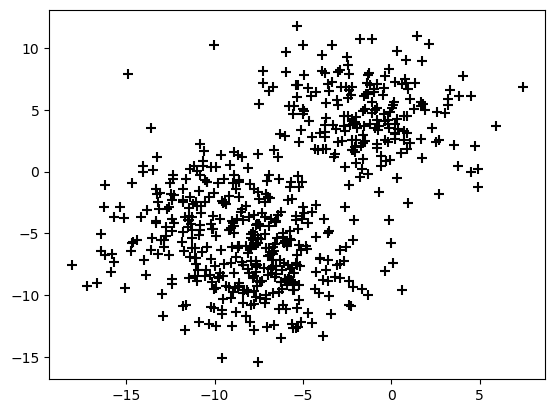

In [3]:
x, y = datasets.make_blobs(n_samples=600, n_features=2, cluster_std=3, random_state=1)

plt.scatter(x[:,0], x[:,1], c='k', marker='+', s=50)
plt.show()

## K Nearest Neighbors

In [4]:
import mlxtend as mlx

print("ML Extend version: "+ mlx.__version__)

ML Extend version: 0.22.0


<Axes: >

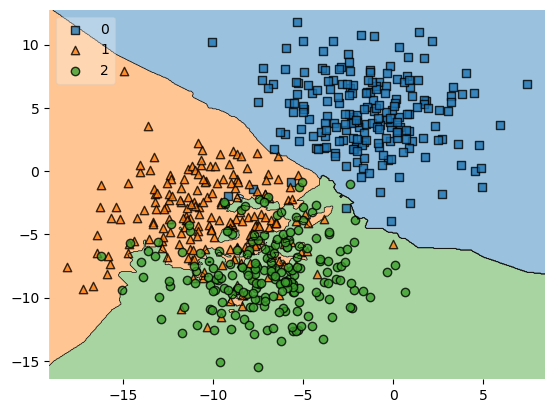

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='ball_tree') #n_neighbors = 5 algorithm='auto'

knn.fit(x, y)

from mlxtend.plotting import plot_decision_regions

fig, ax = plt.subplots()

plot_decision_regions(x, y, clf=knn, legend=2, ax=ax)

<Axes: >

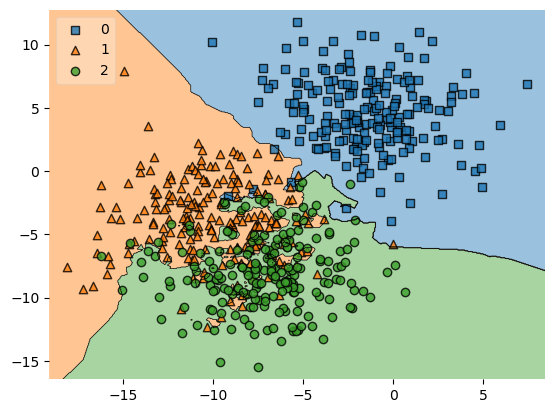

In [6]:
knn = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree')

knn.fit(x, y)

fig, ax = plt.subplots()

plot_decision_regions(x, y, clf=knn, legend=2, ax=ax)

<Axes: >

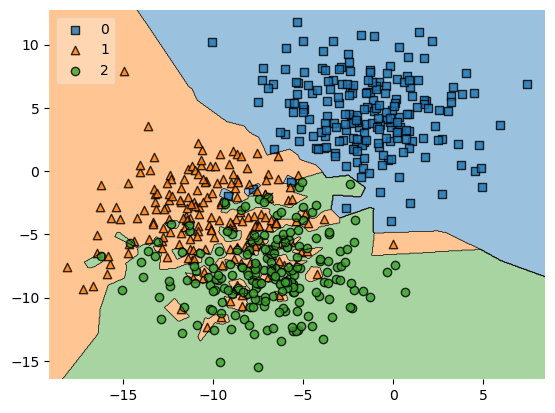

In [7]:
knn = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')

knn.fit(x, y)

fig, ax = plt.subplots()

plot_decision_regions(x, y, clf=knn, legend=2, ax=ax)

<Axes: >

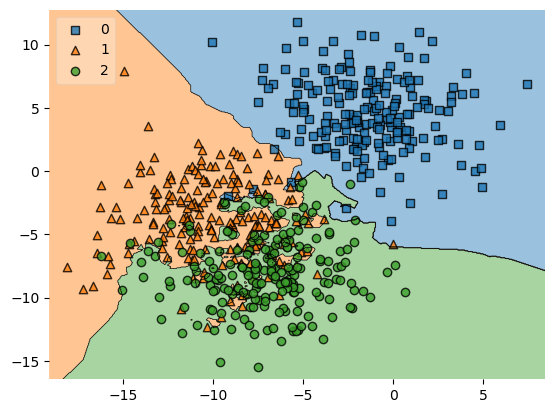

In [8]:
knn = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')

knn.fit(x, y)

fig, ax = plt.subplots()

plot_decision_regions(x, y, clf=knn, legend=2, ax=ax)

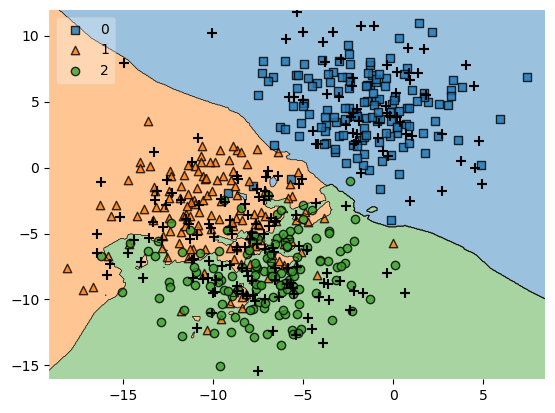

In [9]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, stratify=y)

knn = KNeighborsClassifier()

knn.fit(xTrain, yTrain)

fig, ax = plt.subplots()

plot_decision_regions(xTrain, yTrain, clf=knn, legend=2, ax=ax)
plt.scatter(xTest[:,0], xTest[:,1], c='k', marker='+', s=50)

In [10]:
from sklearn import metrics
from sklearn import model_selection

knnPred = knn.predict(xTest) #Shape => (200,1) [2]
knnProb = knn.predict_proba(xTest) #Shape => (200, 3) [0.1, 0.4, 0.5]

print("Accuracy: ", metrics.balanced_accuracy_score(yTest, knnPred))
print("F1: ", metrics.f1_score(yTest, knnPred, average='weighted'))
print("Loss: ", metrics.log_loss(yTest, knnProb))
print("Cross validation: ", model_selection.cross_val_score(knn, x, y))

print(metrics.classification_report(yTest, knnPred))

Accuracy:  0.8388888888888889
F1:  0.8388888888888889
Loss:  1.0739292957906827
Cross validation:  [0.88333333 0.78333333 0.875      0.85833333 0.825     ]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       0.77      0.77      0.77        60
           2       0.77      0.77      0.77        60

    accuracy                           0.84       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.84      0.84      0.84       180



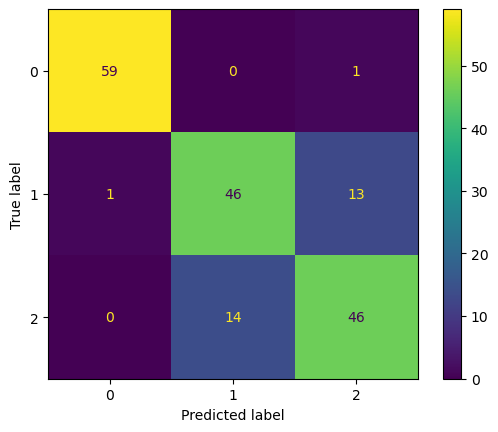

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(yTest, knnPred, labels=knn.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

plt.show()

#metrics.plot_confusion_matrix(knn, xTest, yTest)

<img src="BiasVariance.png">

## Prototype kMeans

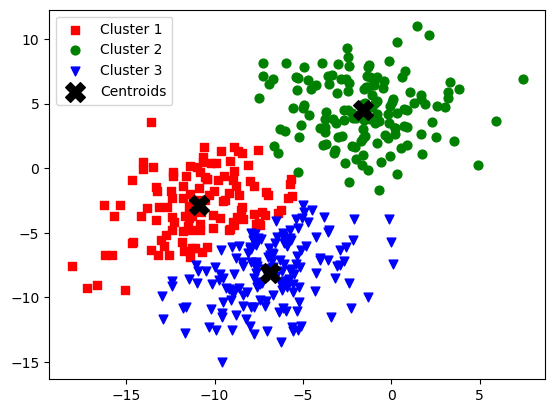

In [12]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(xTrain)

plt.scatter(xTrain[y_km==0, 0], xTrain[y_km==0, 1], s=40, c='r', marker='s', label='Cluster 1')
plt.scatter(xTrain[y_km==1, 0], xTrain[y_km==1, 1], s=40, c='g', marker='o', label='Cluster 2')
plt.scatter(xTrain[y_km==2, 0], xTrain[y_km==2, 1], s=40, c='b', marker='v', label='Cluster 3')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, c='k', marker='X', label='Centroids')

plt.legend(scatterpoints=1)

In [13]:
centroids = knn.predict(km.cluster_centers_)

print(km.cluster_centers_, centroids)

[[-10.91061078  -2.87760003]
 [ -1.5756793    4.5006088 ]
 [ -6.83660986  -8.13695573]] [1 0 2]


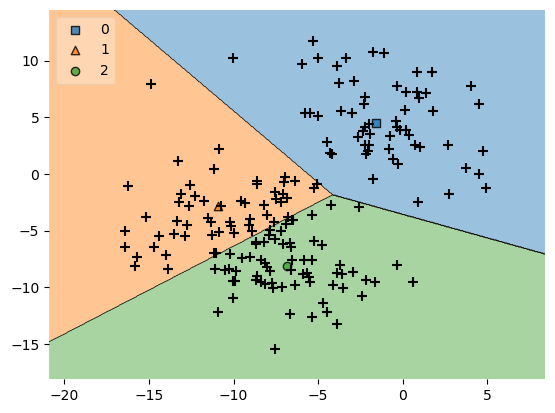

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(km.cluster_centers_, centroids)

fig, ax = plt.subplots()

plot_decision_regions(km.cluster_centers_, centroids, clf=knn, legend=2, zoom_factor=0.1)

plt.scatter(xTest[:,0], xTest[:,1], c='k', marker='+', s=50)

In [15]:
import numpy as np

dataset = np.c_[xTrain, yTrain]

class0 = dataset[dataset[:,2]==0]
class0 = class0[:, :-1]

class1 = dataset[dataset[:,2]==1]
class1 = class1[:, :-1]

class2 = dataset[dataset[:,2]==2]
class2 = class2[:, :-1]

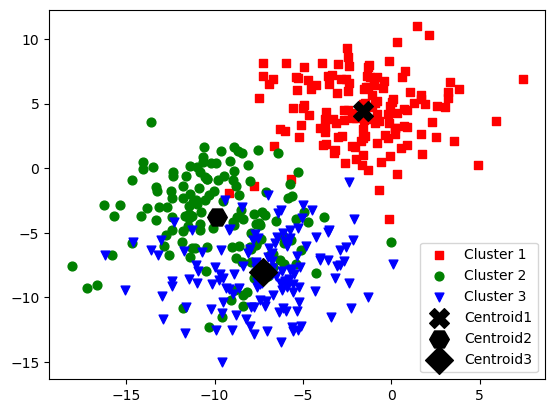

In [16]:
km0 = KMeans(n_clusters=1, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km0 = km0.fit_predict(class0)

km1 = KMeans(n_clusters=1, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km1 = km1.fit_predict(class1)

km2 = KMeans(n_clusters=1, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km1 = km2.fit_predict(class2)

plt.scatter(class0[:,0], class0[:,1], s=40, c='r', marker='s', label='Cluster 1')
plt.scatter(class1[:,0], class1[:,1], s=40, c='g', marker='o', label='Cluster 2')
plt.scatter(class2[:,0], class2[:,1], s=40, c='b', marker='v', label='Cluster 3')

centers0 = km0.cluster_centers_[0]
plt.scatter(centers0[0], centers0[1], s=200, c='k', marker='X', label='Centroid1')
centers1 = km1.cluster_centers_[0]
plt.scatter(centers1[0], centers1[1], s=200, c='k', marker='H', label='Centroid2')
centers2 = km2.cluster_centers_[0]
plt.scatter(centers2[0], centers2[1], s=200, c='k', marker='D', label='Centroid3')

plt.legend(scatterpoints=1)

In [17]:
knnPred = knn.predict(xTest) #Shape => (200,1) [2]
knnProb = knn.predict_proba(xTest) #Shape => (200, 3) [0.1, 0.4, 0.5]

print("Accuracy: ", metrics.balanced_accuracy_score(yTest, knnPred))
print("F1: ", metrics.f1_score(yTest, knnPred, average='weighted'))
print("Loss: ", metrics.log_loss(yTest, knnProb))
print("Cross validation: ", model_selection.cross_val_score(knn, x, y))

print(metrics.classification_report(yTest, knnPred))

Accuracy:  0.8555555555555556
F1:  0.8559520426528099
Loss:  5.206305489539145
Cross validation:  [0.8        0.76666667 0.8        0.78333333 0.84166667]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.82      0.75      0.78        60
           2       0.76      0.83      0.79        60

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



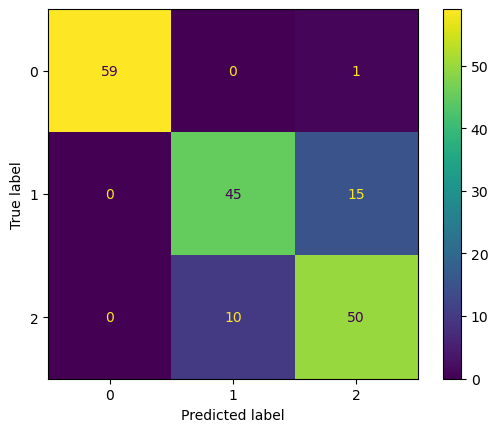

In [18]:
cm = confusion_matrix(yTest, knnPred, labels=knn.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

plt.show()

#metrics.plot_confusion_matrix(knn, xTest, yTest)

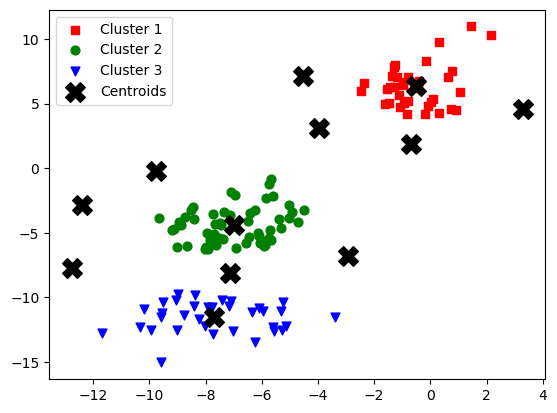

In [19]:
km = KMeans(n_clusters=12, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(xTrain)

plt.scatter(xTrain[y_km==0, 0], xTrain[y_km==0, 1], s=40, c='r', marker='s', label='Cluster 1')
plt.scatter(xTrain[y_km==1, 0], xTrain[y_km==1, 1], s=40, c='g', marker='o', label='Cluster 2')
plt.scatter(xTrain[y_km==2, 0], xTrain[y_km==2, 1], s=40, c='b', marker='v', label='Cluster 3')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, c='k', marker='X', label='Centroids')

plt.legend(scatterpoints=1)

In [20]:
centroids = knn.predict(km.cluster_centers_)

print(km.cluster_centers_, centroids)

[[ -0.50164028   6.33947785]
 [ -6.98453418  -4.4117929 ]
 [ -7.69418581 -11.5334846 ]
 [-12.38213692  -2.88781566]
 [ -7.13582828  -8.13717949]
 [ -4.55087283   7.16831194]
 [ -3.95250301   3.13179922]
 [-12.76768398  -7.70476491]
 [ -0.67262361   1.85361787]
 [ -2.92027843  -6.78305606]
 [ -9.76098412  -0.2575245 ]
 [  3.28019418   4.58801542]] [0 2 2 1 2 0 0 1 0 2 1 0]


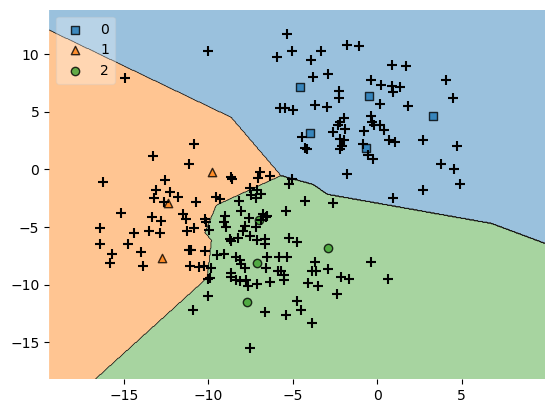

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(km.cluster_centers_, centroids)

fig, ax = plt.subplots()

plot_decision_regions(km.cluster_centers_, centroids, clf=knn, legend=2, zoom_factor=0.15)
plt.scatter(xTest[:,0], xTest[:,1], c='k', marker='+', s=50)

In [22]:
knnPred = knn.predict(xTest) 
knnProb = knn.predict_proba(xTest)

print("Accuracy: ", metrics.balanced_accuracy_score(yTest, knnPred))
print("F1: ", metrics.f1_score(yTest, knnPred, average='weighted'))
print("Loss: ", metrics.log_loss(yTest, knnProb))
print("Cross validation: ", model_selection.cross_val_score(knn, x, y))

print(metrics.classification_report(yTest, knnPred))

Accuracy:  0.8444444444444444
F1:  0.8428571428571429
Loss:  5.606790527196002
Cross validation:  [0.8        0.76666667 0.8        0.78333333 0.84166667]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.87      0.65      0.74        60
           2       0.71      0.90      0.79        60

    accuracy                           0.84       180
   macro avg       0.86      0.84      0.84       180
weighted avg       0.86      0.84      0.84       180



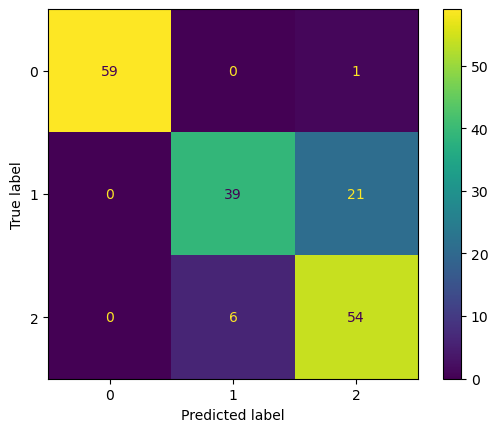

In [23]:
cm = confusion_matrix(yTest, knnPred, labels=knn.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

plt.show()
#metrics.plot_confusion_matrix(knn, xTest, yTest)